In [ ]:
import jax
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

from abmax.structs import *


import seaborn as sns
sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

MAX_SPAWN_X = 100.0 # max x in spawning arena
MAX_SPAWN_Y = MAX_SPAWN_X # max y in spawning arena
FORAGER_RADIUS = 5.0
EP_LEN = 2000
NUM_FORAGERS = 1

In [5]:
from matplotlib.collections import LineCollection
import numpy as np

def render_static_trajectory(RENDER_DATA_PATH, figname):
    forager_xs = jnp.load(RENDER_DATA_PATH + 'rendering_foragers_xs.npy')
    forager_ys = jnp.load(RENDER_DATA_PATH + 'rendering_foragers_ys.npy')
    forager_angs = jnp.load(RENDER_DATA_PATH + 'rendering_foragers_angs.npy')
    forager_energies = jnp.load(RENDER_DATA_PATH + 'rendering_forager_energies.npy')

    forager_xs = jnp.reshape(forager_xs, (forager_xs.shape[0], EP_LEN, NUM_FORAGERS))
    forager_ys = jnp.reshape(forager_ys, (forager_ys.shape[0], EP_LEN, NUM_FORAGERS))
    forager_angs = jnp.reshape(forager_angs, (forager_angs.shape[0], EP_LEN, NUM_FORAGERS))
    forager_energies = jnp.reshape(forager_energies, (forager_energies.shape[0], EP_LEN, NUM_FORAGERS))

    forager_xs = forager_xs[0]
    forager_ys = forager_ys[0]
    forager_angs = forager_angs[0]
    forager_energies = forager_energies[0]
    
    # Setup figure
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-1.2*MAX_SPAWN_X, 1.2*MAX_SPAWN_X)
    ax.set_ylim(-1.2*MAX_SPAWN_Y, 1.2*MAX_SPAWN_Y)
    ax.set_aspect('equal')
    ax.set_xticks(jnp.arange(-0.6*MAX_SPAWN_X, 1.2*MAX_SPAWN_X+1, 60))
    ax.set_yticks(jnp.arange(-1.2*MAX_SPAWN_Y, 1.2*MAX_SPAWN_Y+1, 60))
    ax.tick_params(axis='both', which='major', labelsize=22)

    
    # Plot trajectories for each forager with gradient coloring
    for i in range(NUM_FORAGERS):
        # Extract trajectory for this forager
        x_traj = np.array(forager_xs[:, i])
        y_traj = np.array(forager_ys[:, i])
        
        # Create segments for the line collection
        points = np.array([x_traj, y_traj]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create gradient coloring (light at start, dark at end)
        cmap = plt.cm.Blues
        norm = plt.Normalize(0, len(segments))
        lc = LineCollection(segments, cmap=cmap, norm=norm, alpha=0.7, linewidth=1.0)
        
        # Set gradient from dark to light (don't invert the array)
        lc.set_array(np.arange(len(segments)))
        
        # Add line collection to plot
        ax.add_collection(lc)
        
        # Add 'X' marker at starting point
        ax.plot(x_traj[0], y_traj[0], 'X', color='blue', markersize=8, label='Start' if i == 0 else "")
    
    # Final positions with orientation arrows
    final_xs = forager_xs[-1, :]
    final_ys = forager_ys[-1, :]
    final_angs = forager_angs[-1, :]
    
    #make foragers opaque by changing alpha to 1.0
    forager_scatter = ax.scatter(final_xs, final_ys, c='b', s=FORAGER_RADIUS*100, 
                                alpha=0.8, edgecolors='black', linewidths=1.5, label='Foragers')
    forager_quiver = ax.quiver(final_xs, final_ys, 
                              jnp.cos(final_angs), jnp.sin(final_angs), 
                              color='b', scale=20.0)
    #add a dummy line for the trajectory legend
    ax.plot([], [], color='tab:blue', alpha=0.9, lw=1.2, label='Trajectory')

    #plt.legend(loc='upper right', fontsize=22)
    plt.savefig(figname, bbox_inches='tight')
    
    plt.show()

In [6]:
def plot_hidden_states(RENDER_DATA_PATH, figname):
    neuron_data_e_10 = jnp.load(RENDER_DATA_PATH + '/e_10/rendering_forager_0_zs.npy')
    neuron_data_e_20 = jnp.load(RENDER_DATA_PATH + '/e_20/rendering_forager_0_zs.npy')
    neuron_data_e_30 = jnp.load(RENDER_DATA_PATH + '/e_30/rendering_forager_0_zs.npy')
    neuron_data_e_40 = jnp.load(RENDER_DATA_PATH + '/e_40/rendering_forager_0_zs.npy')

    std_dev_neuron_data_e_10 = jnp.std(neuron_data_e_10, axis=0)
    std_dev_neuron_data_e_20 = jnp.std(neuron_data_e_20, axis=0)
    std_dev_neuron_data_e_30 = jnp.std(neuron_data_e_30, axis=0)
    std_dev_neuron_data_e_40 = jnp.std(neuron_data_e_40, axis=0)

    mean_neuron_data_e_10 = jnp.mean(neuron_data_e_10, axis=0)
    mean_neuron_data_e_20 = jnp.mean(neuron_data_e_20, axis=0)
    mean_neuron_data_e_30 = jnp.mean(neuron_data_e_30, axis=0)
    mean_neuron_data_e_40 = jnp.mean(neuron_data_e_40, axis=0)


    fig, axs = plt.subplots(40, 4, figsize=(28, 80))
    for i in range(40):
        #e=10
        axs[i, 0].plot(mean_neuron_data_e_10[:, i])
        axs[i, 0].fill_between(jnp.arange(len(mean_neuron_data_e_10[:, i])),
                                mean_neuron_data_e_10[:, i] - std_dev_neuron_data_e_10[:, i],
                                mean_neuron_data_e_10[:, i] + std_dev_neuron_data_e_10[:, i], alpha=0.2)
        axs[i, 0].set_title(f'Hidden state {i} $\\bar{{e}}$=10', fontsize=14)
        axs[i, 0].set_xlabel('Timestep', fontsize=10)
        axs[i, 0].set_ylabel('Activation', fontsize=10)

        #e=20
        axs[i, 1].plot(mean_neuron_data_e_20[:, i], color='orange')
        axs[i, 1].fill_between(jnp.arange(len(mean_neuron_data_e_20[:, i])),
                                mean_neuron_data_e_20[:, i] - std_dev_neuron_data_e_20[:, i],
                                mean_neuron_data_e_20[:, i] + std_dev_neuron_data_e_20[:, i], alpha=0.2)
        axs[i, 1].set_title(f'Hidden state {i} $\\bar{{e}}$=20', fontsize=14)
        axs[i, 1].set_xlabel('Timestep', fontsize=10)
        axs[i, 1].set_ylabel('Activation', fontsize=10)

        #e=30
        axs[i, 2].plot(mean_neuron_data_e_30[:, i], color='blue')
        axs[i, 2].fill_between(jnp.arange(len(mean_neuron_data_e_30[:, i])),
                                mean_neuron_data_e_30[:, i] - std_dev_neuron_data_e_30[:, i],
                                mean_neuron_data_e_30[:, i] + std_dev_neuron_data_e_30[:, i], alpha=0.2)
        axs[i, 2].set_title(f'Hidden state {i} $\\bar{{e}}$=30', fontsize=14)
        axs[i, 2].set_xlabel('Timestep', fontsize=10)
        axs[i, 2].set_ylabel('Activation', fontsize=10)

        #e=40
        axs[i, 3].plot(mean_neuron_data_e_40[:, i], color='green')
        axs[i, 3].fill_between(jnp.arange(len(mean_neuron_data_e_40[:, i])),
                                mean_neuron_data_e_40[:, i] - std_dev_neuron_data_e_40[:, i],
                                mean_neuron_data_e_40[:, i] + std_dev_neuron_data_e_40[:, i], alpha=0.2)
        axs[i, 3].set_title(f'Hidden state {i} $\\bar{{e}}$=40', fontsize=14)
        axs[i, 3].set_xlabel('Timestep', fontsize=10)
        axs[i, 3].set_ylabel('Activation', fontsize=10)
    plt.tight_layout()
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

   

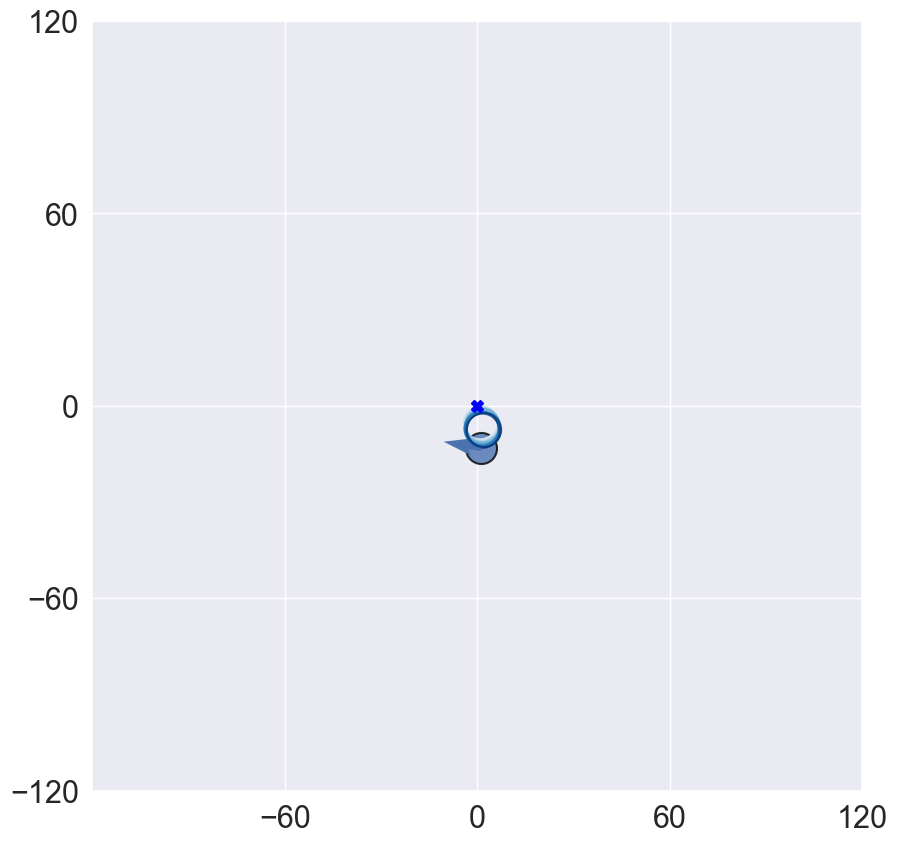

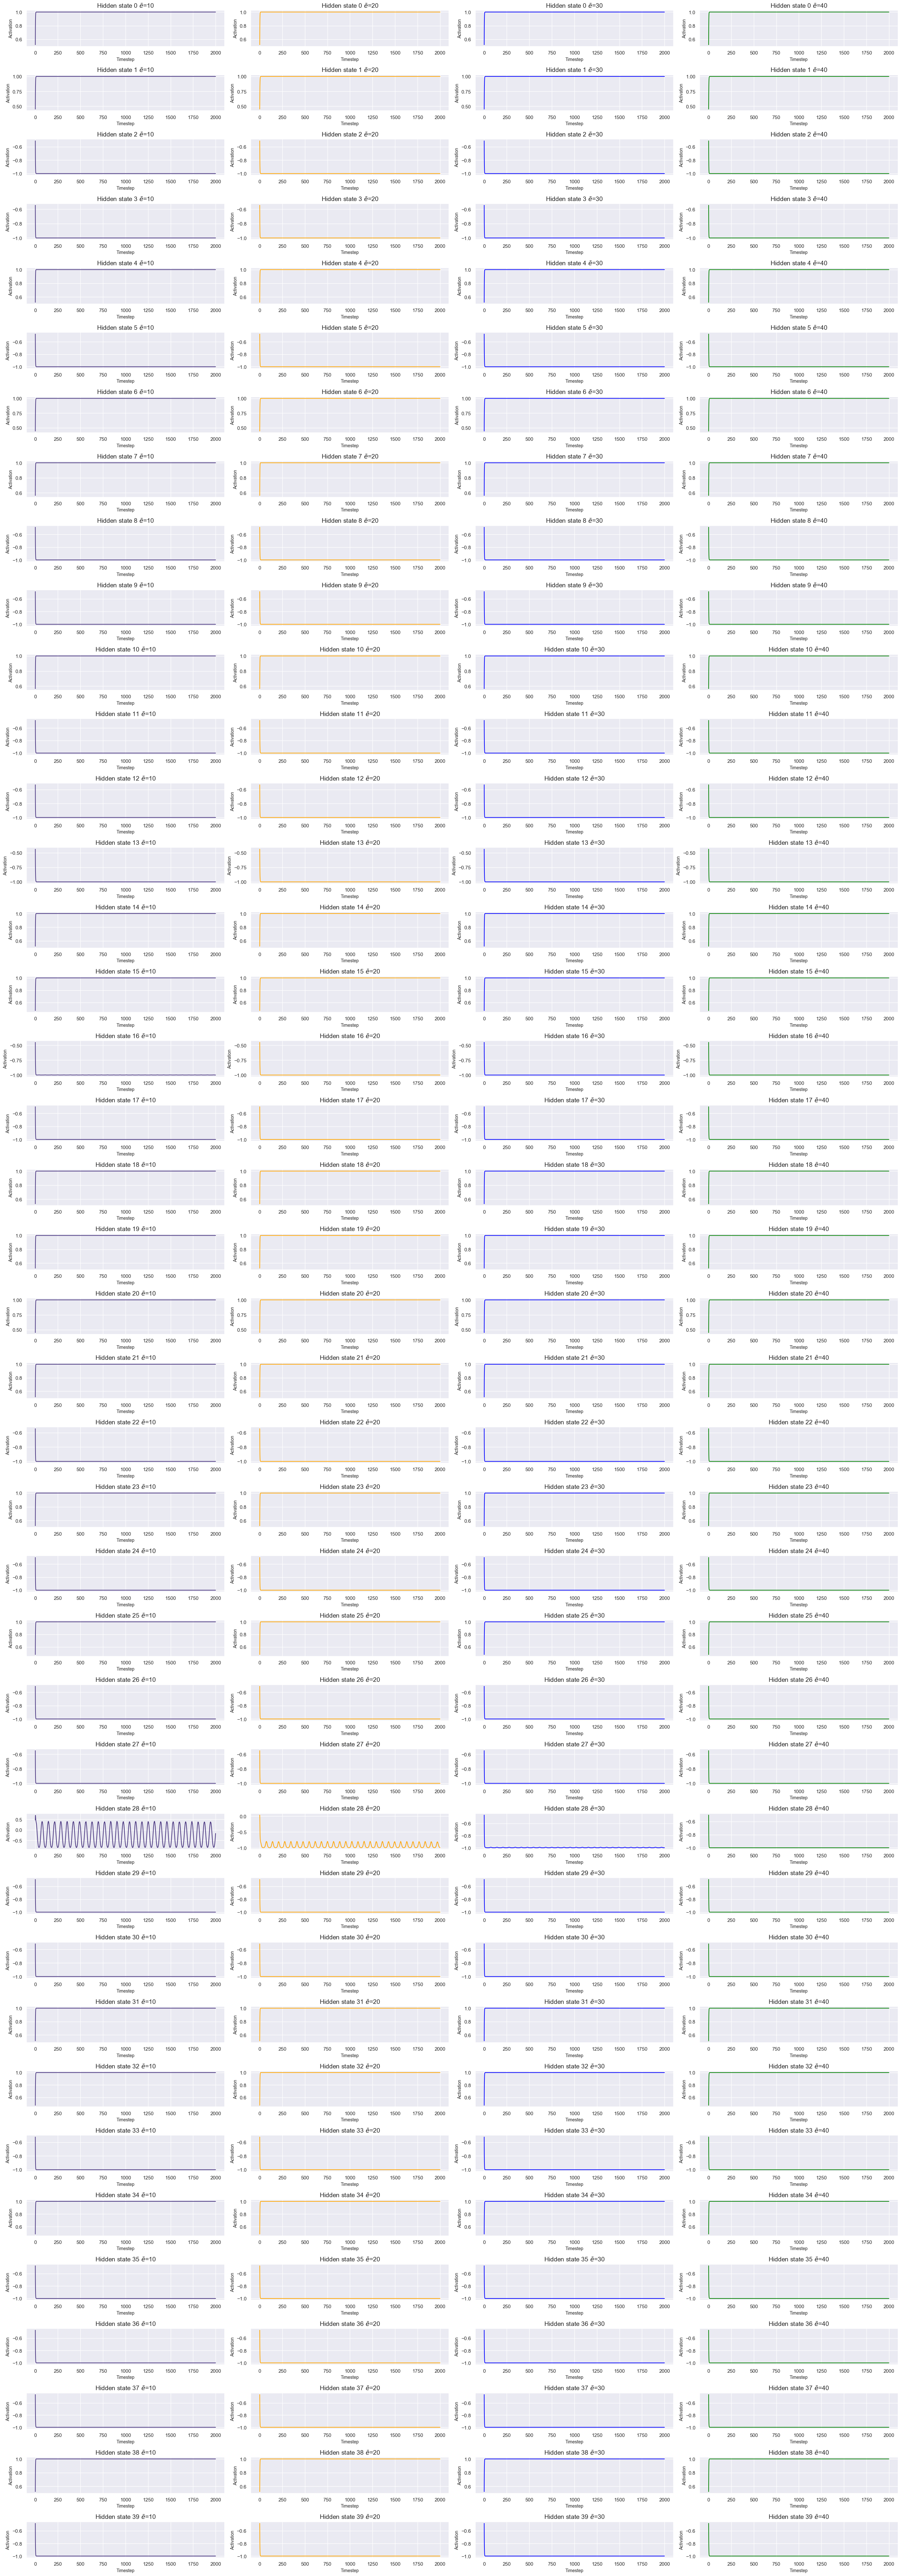

In [7]:
render_data_path = "./trajectories_s_7/e_30/"
figname = "./figs/solitary_s_7_e_30.png"
render_static_trajectory(render_data_path, figname)
render_data_path = "./trajectories_s_7/"
figname = "./figs/CTRNN_hidden_states_s_7.png"
plot_hidden_states(render_data_path, figname)

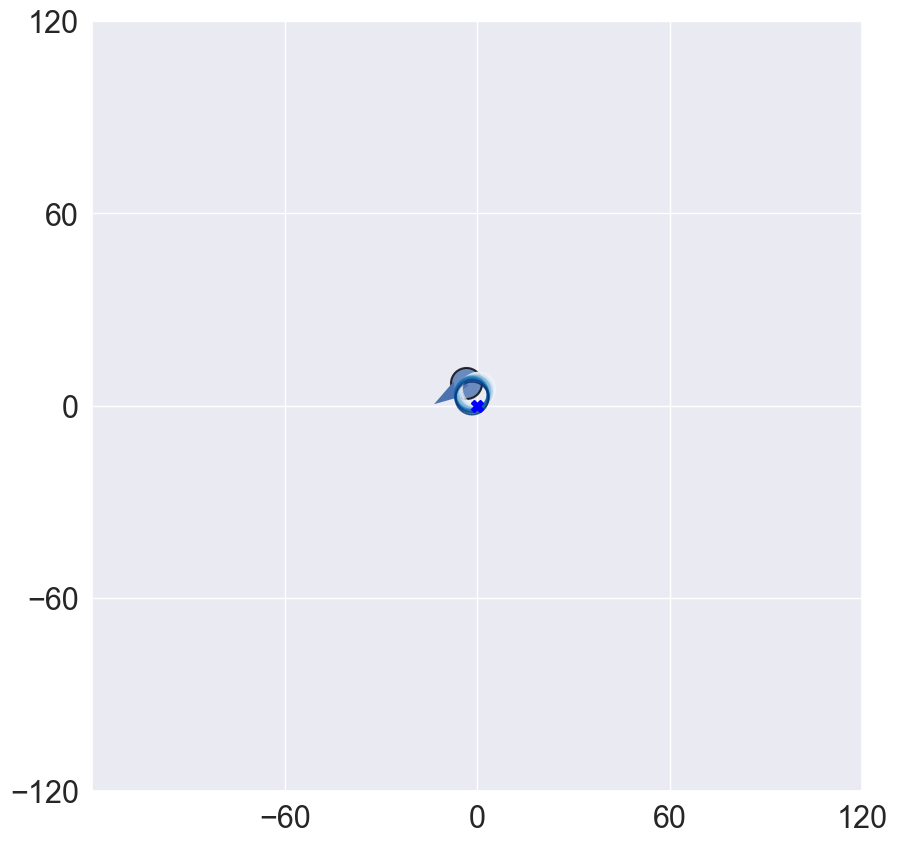

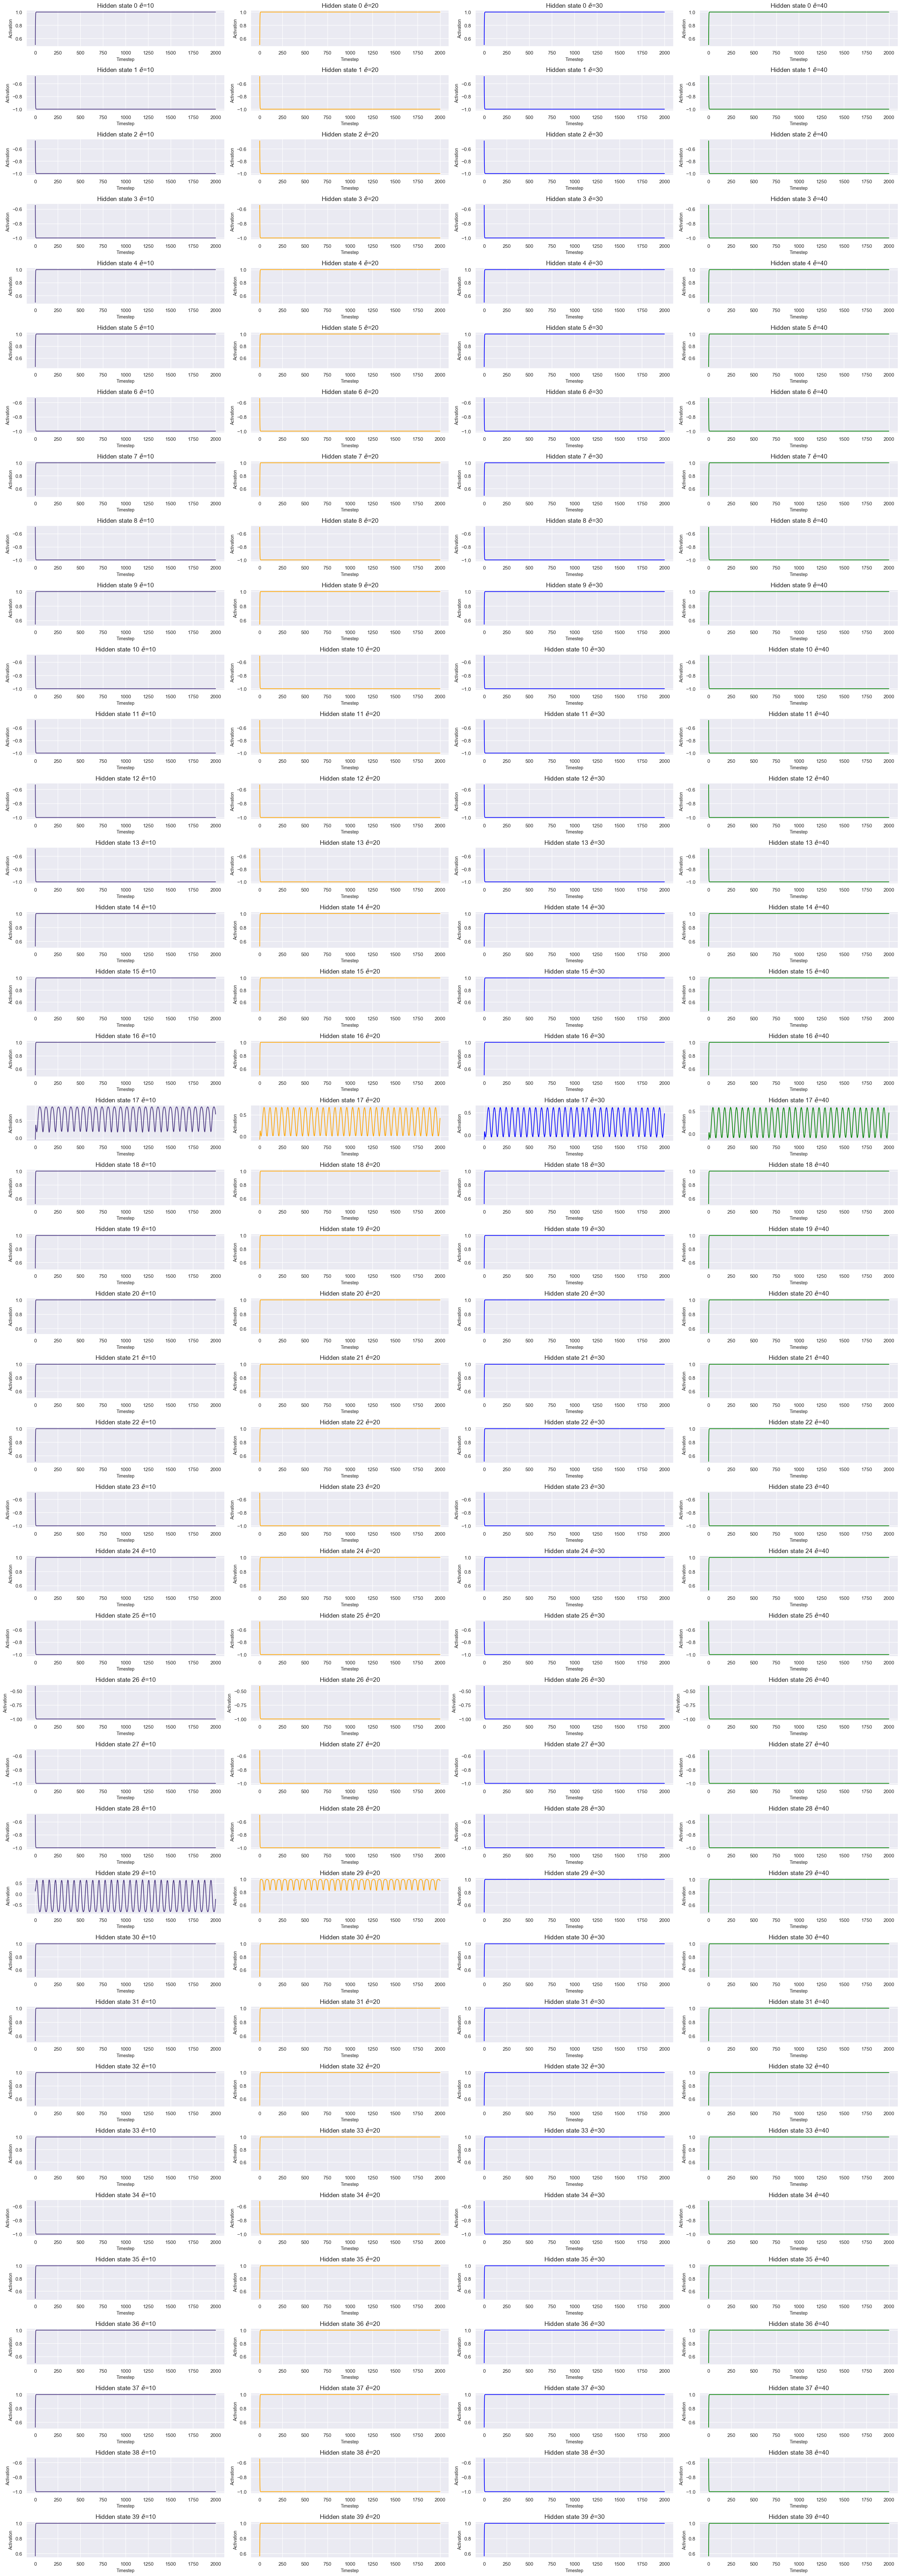

In [8]:
render_data_path = "./trajectories_s_5/e_30/"
figname = "./figs/solitary_s_5_e_30.png"
render_static_trajectory(render_data_path, figname)
render_data_path = "./trajectories_s_5/"
figname = "./figs/CTRNN_hidden_states_s_5.png"
plot_hidden_states(render_data_path, figname)

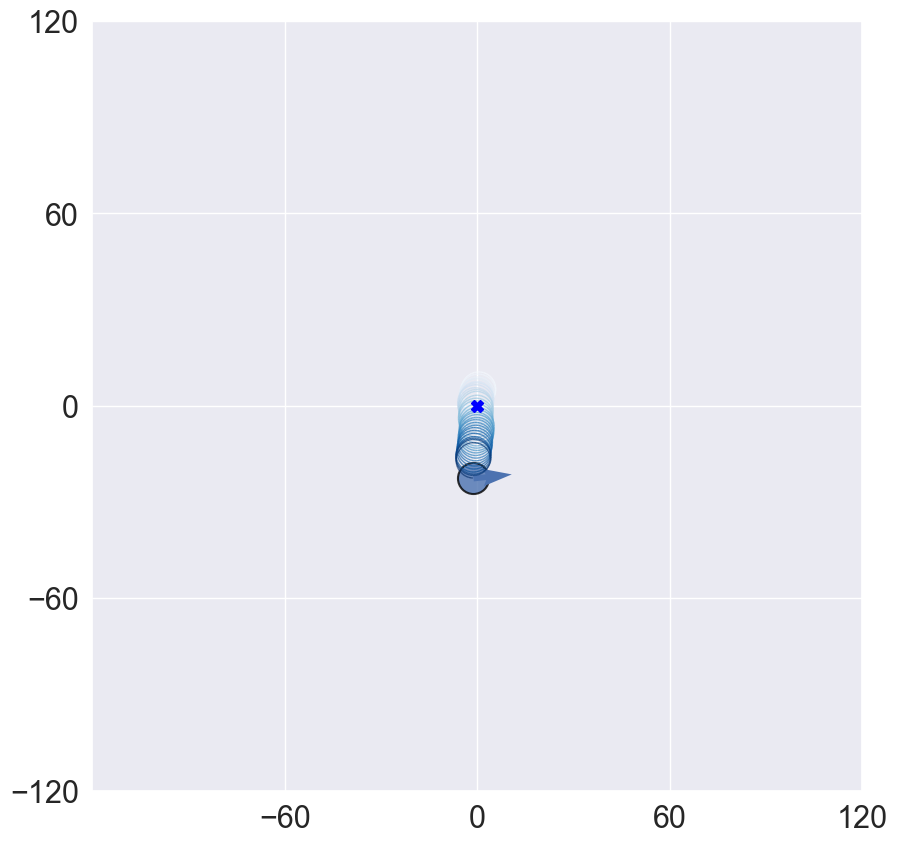

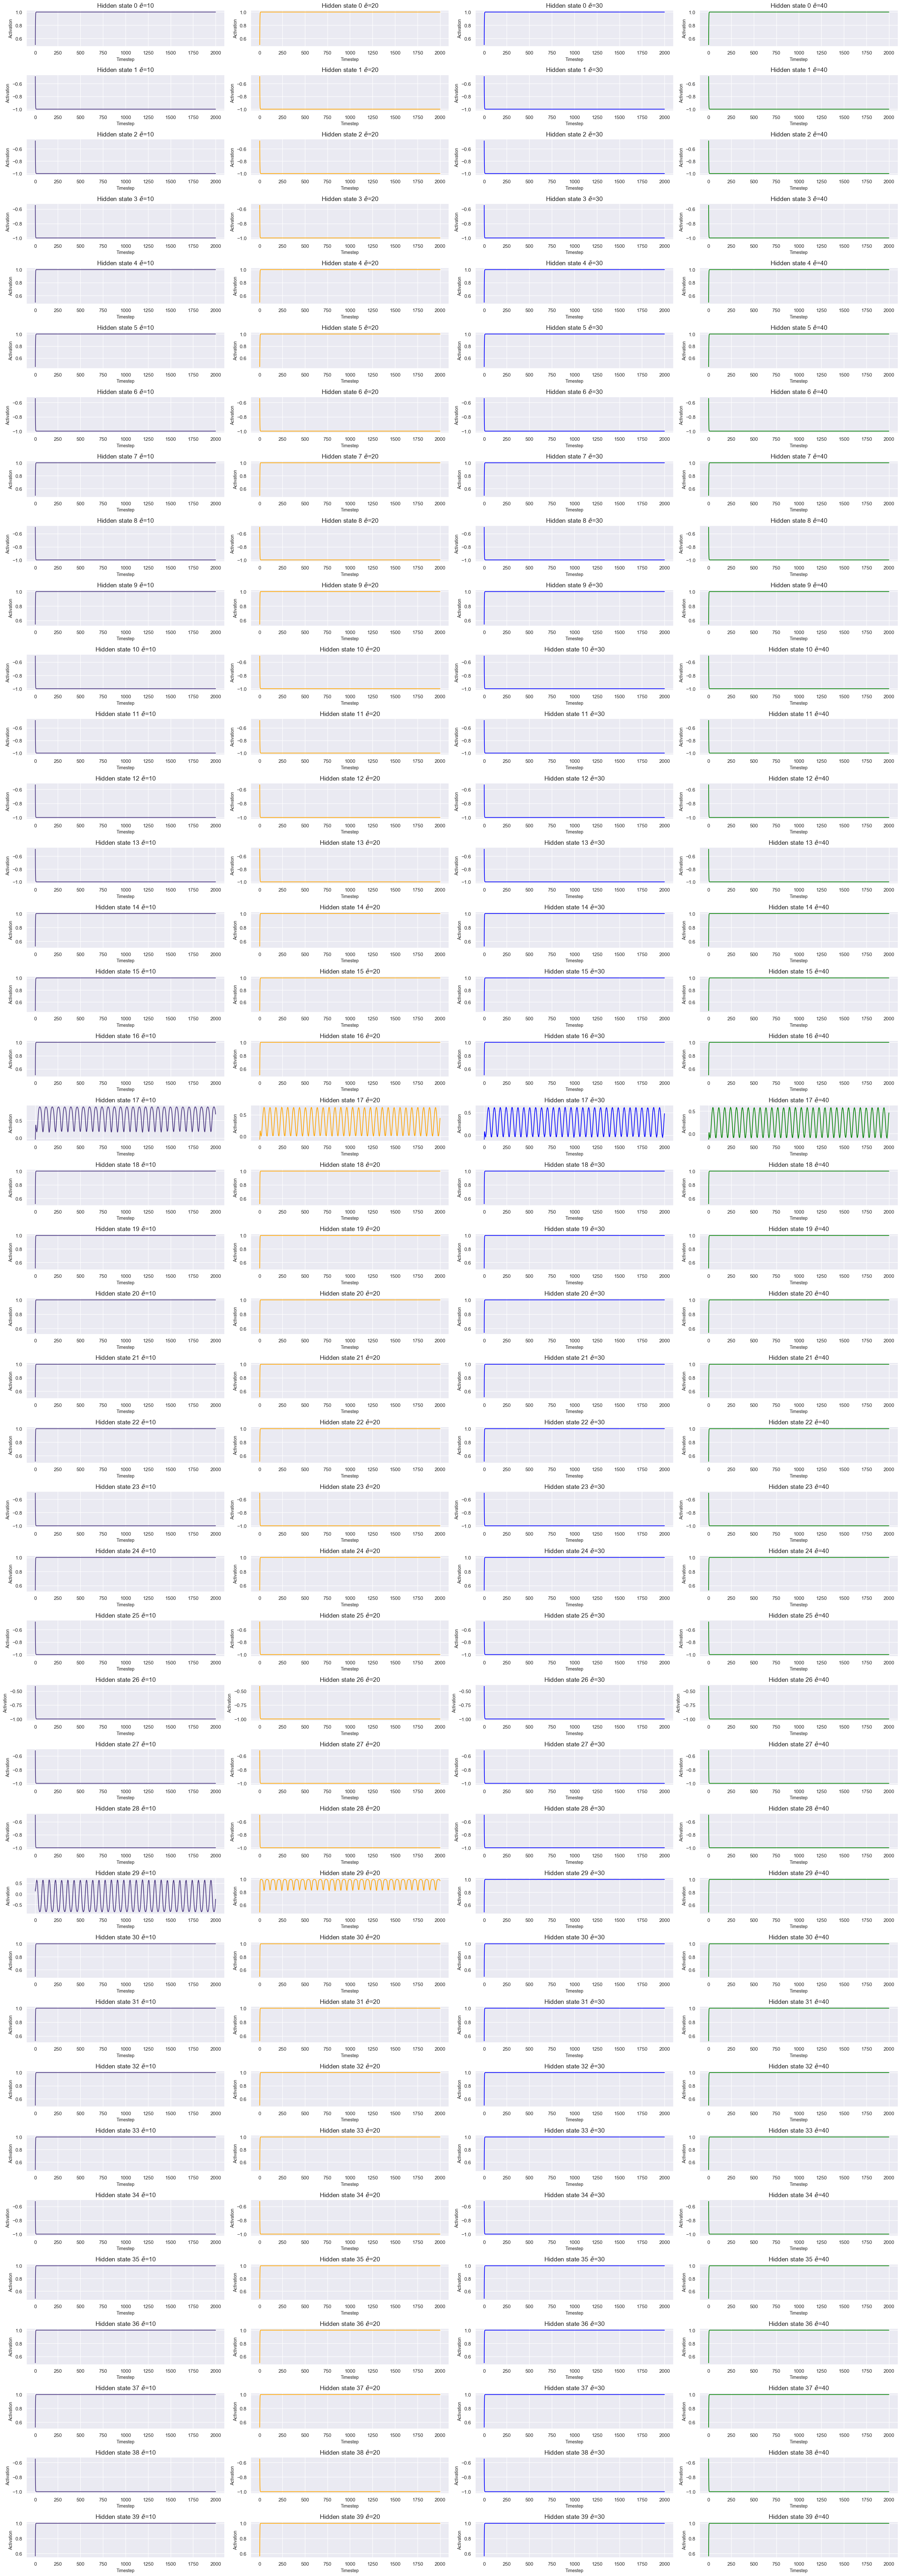

In [23]:
render_data_path = "./trajectories_s_5/e_10/"
figname = "./figs/solitary_s_5_e_10.svg"
render_static_trajectory(render_data_path, figname)
render_data_path = "./trajectories_s_5/"
figname = "./figs/CTRNN_hidden_states_s_5.svg"
plot_hidden_states(render_data_path, figname)

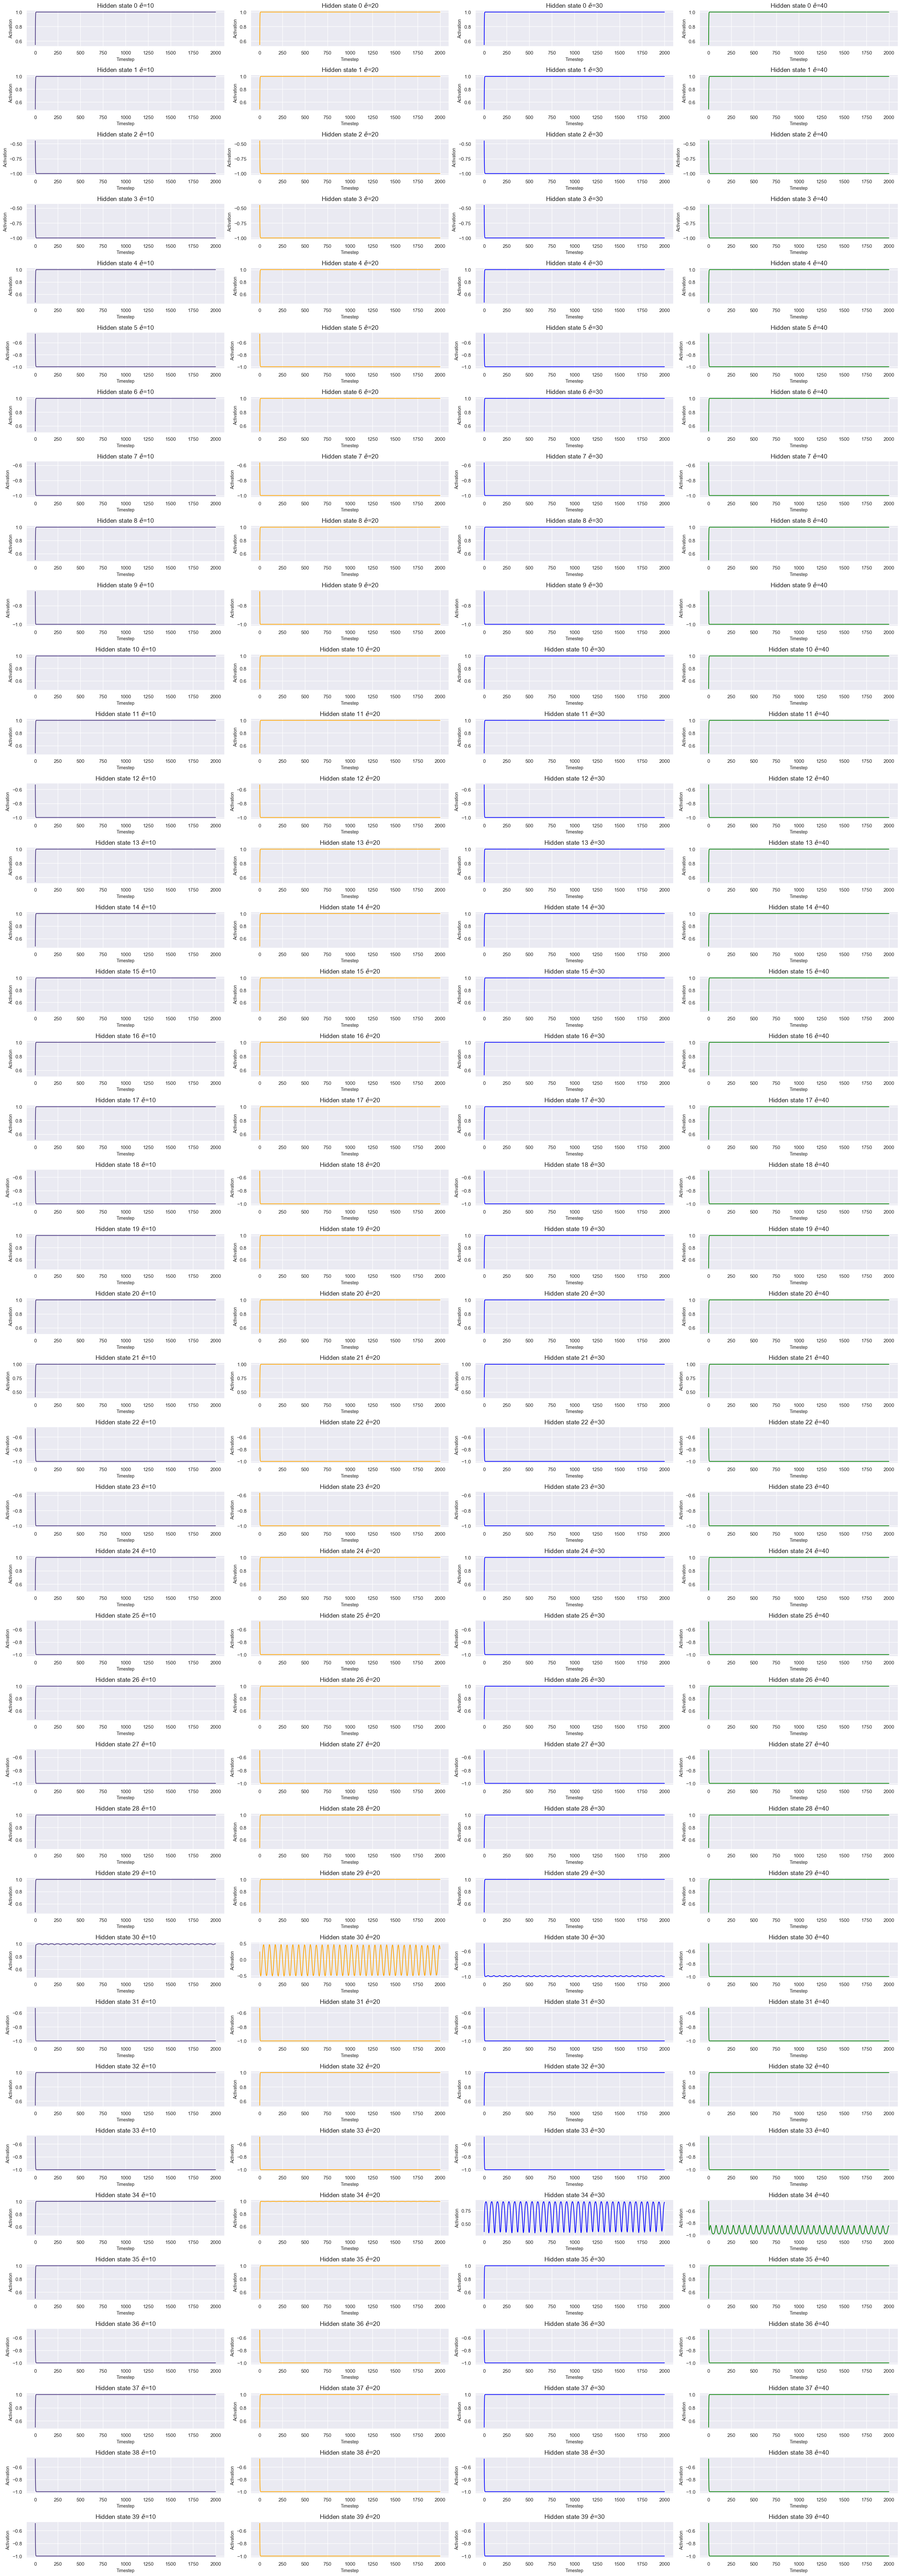

In [9]:
render_data_path = "./trajectories_s_11/"
figname = "./figs/CTRNN_hidden_states_s_11.png"
plot_hidden_states(render_data_path, figname)